In [1]:
# We are going to implement a kmeans algorithm
# We will code each function separately and then put them together
# we will build a class to hold the functions
from sklearn.datasets import load_iris, load_wine
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from KmeansClassifier import KmeansClassifier
from sklearn.decomposition import PCA

import KmeansClassifier as kc


import importlib

In [2]:
cwd = os.getcwd()
print(cwd)

/Users/manulabricole/Documents/CDN/MachineLearning/ML3/ML3.2


In [3]:
iris = load_iris()
wine = load_wine()

In [13]:
clf = KmeansClassifier(random_state=42, k=3, max_iter=100)

In [14]:
clf.fit(wine)

Iteration -->  0  <-- /  100  ...
Iteration -->  1  <-- /  100  ...
Iteration -->  2  <-- /  100  ...
Iteration -->  3  <-- /  100  ...
Iteration -->  4  <-- /  100  ...
Iteration -->  5  <-- /  100  ...
Iteration -->  6  <-- /  100  ...
Iteration -->  7  <-- /  100  ...
Iteration -->  8  <-- /  100  ...
Iteration -->  9  <-- /  100  ...


------------------------ PLOT ----------------------


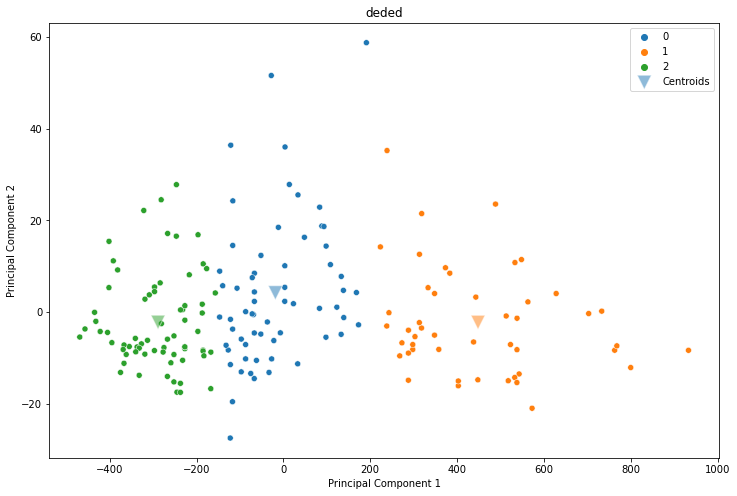

In [15]:
clf.plot("deded")

In [16]:
history = clf.history

In [17]:
history

{0: {'centroids': array([[1.31774074e+01, 2.63666667e+00, 2.44777778e+00, 1.94925926e+01,
          1.11037037e+02, 2.26185185e+00, 1.84222222e+00, 3.68148148e-01,
          1.65666667e+00, 5.51629630e+00, 8.92444444e-01, 2.58925926e+00,
          8.19925926e+02],
         [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
          1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
          1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
          1.19514894e+03],
         [1.25914423e+01, 2.46307692e+00, 2.31846154e+00, 2.06125000e+01,
          9.42019231e+01, 2.04519231e+00, 1.63269231e+00, 3.94807692e-01,
          1.42942308e+00, 4.64788461e+00, 9.19711538e-01, 2.39048077e+00,
          5.25355769e+02]]),
  'cluster': array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
         1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2,
         0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,

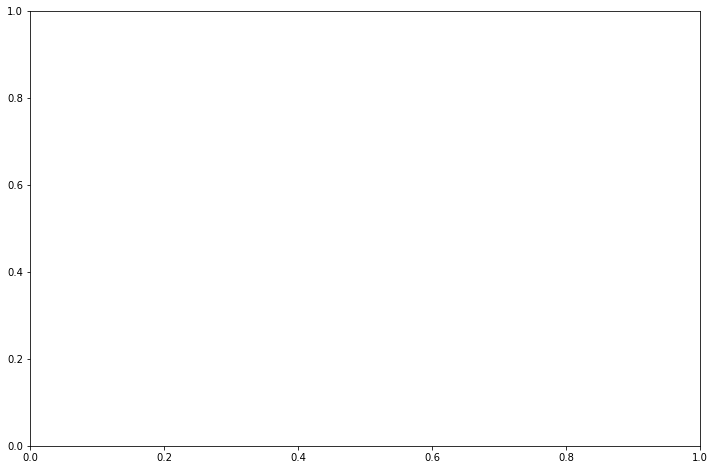

In [29]:
import matplotlib.animation as animation


# Set up the figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))

def update(frame):

    centroids = history[frame]['centroids']
    labels = history[frame]['cluster']
    data = history[frame]['data']
    
    pca = PCA(n_components=2)
    
    data_PCA = pca.fit_transform(data)
    centroids_pca = pca.transform(centroids)
    
    
    df_data = pd.DataFrame(data_PCA, columns=['PC1', 'PC2'])
    df_centroids = pd.DataFrame(centroids_pca, columns=['PC1', 'PC2'])
    
    df_data['label'] = pd.Series(labels, index=df_data.index)

    ax.clear()
    
    sns.scatterplot(
        ax=ax,
        x='PC1',
        y='PC2',
        hue='label',
        data=df_X,
        palette='tab10',
        marker='o',
        label='data',
    )
    
    sns.scatterplot(
        ax=ax,
        x='PC1',
        y='PC2',
        hue=df_centroids.index,
        data=df_centroids,
        palette='tab10',
        s=200,
        marker='v',
        alpha=.5,
        label='Centroids',
        legend=False
    )
    
    handles, labels = ax.get_legend_handles_labels()
        
    ax.legend(handles=handles[1:], labels=labels[1:])
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(title)
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(history), interval=1000)
plt.show()